# データ・サイエンス	データ・サイエンス社会応用論 / ICT社会応用演習Ⅳ
## 9-3. 交通事故統計情報の分析（山形県内日次集計）

### 1. 下準備
#### 1-a) ライブラリのインポート

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import jpholiday
import japanize_matplotlib

#### 1-b) 交通事故統計情報の読み込み

In [5]:
df_accident1 = pd.read_csv('data/accident/honhyo_2019.csv', encoding='SHIFT-JIS')
df_accident2 = pd.read_csv('data/accident/honhyo_2020.csv', encoding='SHIFT-JIS')
df_accident3 = pd.read_csv('data/accident/honhyo_2021.csv', encoding='SHIFT-JIS')

df_accident = pd.concat([df_accident1, df_accident2, df_accident3])
df_accident['年月日'] = pd.to_datetime({
    'year' : df_accident['発生日時　　年'], 'month' : df_accident['発生日時　　月'],
    'day' : df_accident['発生日時　　日']
})
df_accident

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),年月日
0,1,10,59,1,2,0,1,40030,2,0,...,2,2,2,4,4,431412959,1414947029,6,3,2018-12-28
1,1,10,59,2,2,0,2,40020,2,0,...,2,2,2,4,4,425706029,1413039991,1,3,2019-01-06
2,1,10,59,3,2,0,1,50020,1,0,...,2,2,2,4,4,424115557,1414158530,3,3,2018-12-18
3,1,10,59,4,2,0,1,40020,2,0,...,1,2,2,4,2,425647051,1413100440,7,3,2019-01-05
4,1,10,59,5,2,0,1,40140,2,0,...,2,2,2,4,2,425606992,1420518034,2,2,2018-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305191,1,97,114,166,2,0,4,33410,0,0,...,1,2,2,2,2,261031432,1273909676,6,3,2021-12-10
305192,1,97,114,167,2,0,1,33410,0,0,...,2,2,2,4,2,260918133,1274003673,4,3,2021-12-15
305193,1,97,114,168,2,0,1,10070,0,0,...,2,2,2,4,2,261022159,1274124558,4,3,2021-12-22
305194,1,97,114,169,2,0,1,33410,0,0,...,0,2,0,4,2,260955144,1273944244,6,3,2021-12-24


#### 1-c) 山形県内の2019年1月1日以降のデータの抽出

In [6]:
df_accident_yamagata = df_accident[df_accident['都道府県コード'] == 24]
df_accident_yamagata = df_accident_yamagata[df_accident_yamagata['年月日'] >= datetime(2019, 1, 1)]
df_accident_yamagata

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),年月日
1871,1,24,101,1,2,0,1,20000,0,0,...,2,2,2,4,2,381500300,1401953200,4,3,2019-01-02
1872,1,24,101,2,2,0,1,10160,0,0,...,0,2,0,4,2,381445400,1402005900,4,3,2019-01-02
1883,1,24,101,13,2,0,1,99000,0,0,...,0,2,0,4,2,381406300,1402014500,1,3,2019-01-06
1885,1,24,101,15,2,0,1,30000,0,0,...,2,2,2,4,2,381447000,1402155500,2,3,2019-01-07
1887,1,24,101,17,2,0,1,3480,2,3070,...,2,2,2,2,4,381359800,1401819600,2,3,2019-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275303,1,24,113,40,2,0,2,20000,0,0,...,2,2,2,2,4,385026600,1395441600,1,3,2021-12-19
275304,1,24,113,41,2,0,1,10441,0,0,...,2,2,2,4,2,385048663,1395336531,2,3,2021-12-27
275305,1,24,113,42,2,0,1,471,0,2,...,0,2,0,4,2,384842032,1395623769,6,3,2021-12-24
275306,1,24,117,11,1,1,0,20000,0,0,...,2,2,2,4,1,380359700,1394441900,3,3,2021-12-14


#### 1-d) 日毎の集計

In [7]:
df_accident_yamagata_daily = df_accident_yamagata.groupby(['年月日'], as_index=False)[['死者数', '負傷者数']].sum()
df_accident_yamagata_daily

,年月日,死者数,負傷者数
0,2019-01-01,0,6
1,2019-01-02,0,16
2,2019-01-03,0,6
3,2019-01-04,0,11
4,2019-01-05,0,13
...,...,...,...
1089,2021-12-26,0,8
1090,2021-12-27,0,13
1091,2021-12-28,0,11
1092,2021-12-29,0,1


#### 1-e) 気象データの読み込み

In [8]:
df_weather = pd.read_csv('data/weather/weather_yamagata.csv', encoding='SHIFT-JIS', header=2)
df_weather = df_weather.drop([0,1]).reset_index(drop=True)
df_weather['年月日'] = pd.to_datetime(df_weather['年月日'])
df_weather

,年月日,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),最深積雪(cm).1,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時)
0,2019-01-01,2.8,-2.5,2.0,0,0.0,1,32.0,0,0.2,0,1.6,雪時々みぞれ一時曇,雪時々曇一時霧
1,2019-01-02,2.4,-2.4,0.0,0,0.0,1,24.0,0,2.7,0,1.4,雪時々曇一時晴、霧を伴う,曇時々雪一時晴
2,2019-01-03,1.8,-3.1,0.0,0,0.0,1,21.0,0,2.2,0,1.4,晴時々雪一時曇,曇一時雪
3,2019-01-04,6.0,0.5,0.0,1,0.0,1,20.0,0,2.2,0,2.3,晴時々曇,晴時々雨一時曇
4,2019-01-05,5.5,-1.8,1.5,0,3.0,0,17.0,0,2.1,0,2.0,雨時々雪,雪時々晴一時曇
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,-2.0,-5.7,9.0,0,12.0,0,34.0,0,0.3,0,1.5,雪時々曇,雪
1092,2021-12-28,-0.4,-4.5,5.5,0,9.0,0,42.0,0,1.2,0,1.8,雪時々曇,雪時々曇後晴
1093,2021-12-29,4.4,-4.6,0.0,0,0.0,1,33.0,0,4.7,0,1.8,曇時々晴一時雪、みぞれを伴う,雨後みぞれ時々晴
1094,2021-12-30,5.7,-2.2,6.5,0,1.0,0,24.0,0,2.4,0,1.8,みぞれ時々曇一時雨,雪時々曇一時みぞれ


#### 1-f) 事故データと天候データの結合

In [9]:
df_accident_weather = pd.merge(df_accident_yamagata_daily, df_weather, on='年月日', how='right').fillna(0)
df_accident_weather

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),最深積雪(cm).1,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時)
0,2019-01-01,0.0,6.0,2.8,-2.5,2.0,0,0.0,1,32.0,0,0.2,0,1.6,雪時々みぞれ一時曇,雪時々曇一時霧
1,2019-01-02,0.0,16.0,2.4,-2.4,0.0,0,0.0,1,24.0,0,2.7,0,1.4,雪時々曇一時晴、霧を伴う,曇時々雪一時晴
2,2019-01-03,0.0,6.0,1.8,-3.1,0.0,0,0.0,1,21.0,0,2.2,0,1.4,晴時々雪一時曇,曇一時雪
3,2019-01-04,0.0,11.0,6.0,0.5,0.0,1,0.0,1,20.0,0,2.2,0,2.3,晴時々曇,晴時々雨一時曇
4,2019-01-05,0.0,13.0,5.5,-1.8,1.5,0,3.0,0,17.0,0,2.1,0,2.0,雨時々雪,雪時々晴一時曇
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,0.0,13.0,-2.0,-5.7,9.0,0,12.0,0,34.0,0,0.3,0,1.5,雪時々曇,雪
1092,2021-12-28,0.0,11.0,-0.4,-4.5,5.5,0,9.0,0,42.0,0,1.2,0,1.8,雪時々曇,雪時々曇後晴
1093,2021-12-29,0.0,1.0,4.4,-4.6,0.0,0,0.0,1,33.0,0,4.7,0,1.8,曇時々晴一時雪、みぞれを伴う,雨後みぞれ時々晴
1094,2021-12-30,0.0,3.0,5.7,-2.2,6.5,0,1.0,0,24.0,0,2.4,0,1.8,みぞれ時々曇一時雨,雪時々曇一時みぞれ


#### 1-g) 曜日と休日の追加

In [10]:
df_accident_weather['曜日'] = df_accident_weather['年月日'].dt.weekday
df_accident_weather['祝日'] = df_accident_weather['年月日'].dt.date.map(jpholiday.is_holiday).astype(int)
df_accident_weather

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),最深積雪(cm).1,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時),曜日,祝日
0,2019-01-01,0.0,6.0,2.8,-2.5,2.0,0,0.0,1,32.0,0,0.2,0,1.6,雪時々みぞれ一時曇,雪時々曇一時霧,1,1
1,2019-01-02,0.0,16.0,2.4,-2.4,0.0,0,0.0,1,24.0,0,2.7,0,1.4,雪時々曇一時晴、霧を伴う,曇時々雪一時晴,2,0
2,2019-01-03,0.0,6.0,1.8,-3.1,0.0,0,0.0,1,21.0,0,2.2,0,1.4,晴時々雪一時曇,曇一時雪,3,0
3,2019-01-04,0.0,11.0,6.0,0.5,0.0,1,0.0,1,20.0,0,2.2,0,2.3,晴時々曇,晴時々雨一時曇,4,0
4,2019-01-05,0.0,13.0,5.5,-1.8,1.5,0,3.0,0,17.0,0,2.1,0,2.0,雨時々雪,雪時々晴一時曇,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,0.0,13.0,-2.0,-5.7,9.0,0,12.0,0,34.0,0,0.3,0,1.5,雪時々曇,雪,0,0
1092,2021-12-28,0.0,11.0,-0.4,-4.5,5.5,0,9.0,0,42.0,0,1.2,0,1.8,雪時々曇,雪時々曇後晴,1,0
1093,2021-12-29,0.0,1.0,4.4,-4.6,0.0,0,0.0,1,33.0,0,4.7,0,1.8,曇時々晴一時雪、みぞれを伴う,雨後みぞれ時々晴,2,0
1094,2021-12-30,0.0,3.0,5.7,-2.2,6.5,0,1.0,0,24.0,0,2.4,0,1.8,みぞれ時々曇一時雨,雪時々曇一時みぞれ,3,0


### 2. 負傷者数の分析
#### 2-a) 傷者数と死者数の推移の可視化

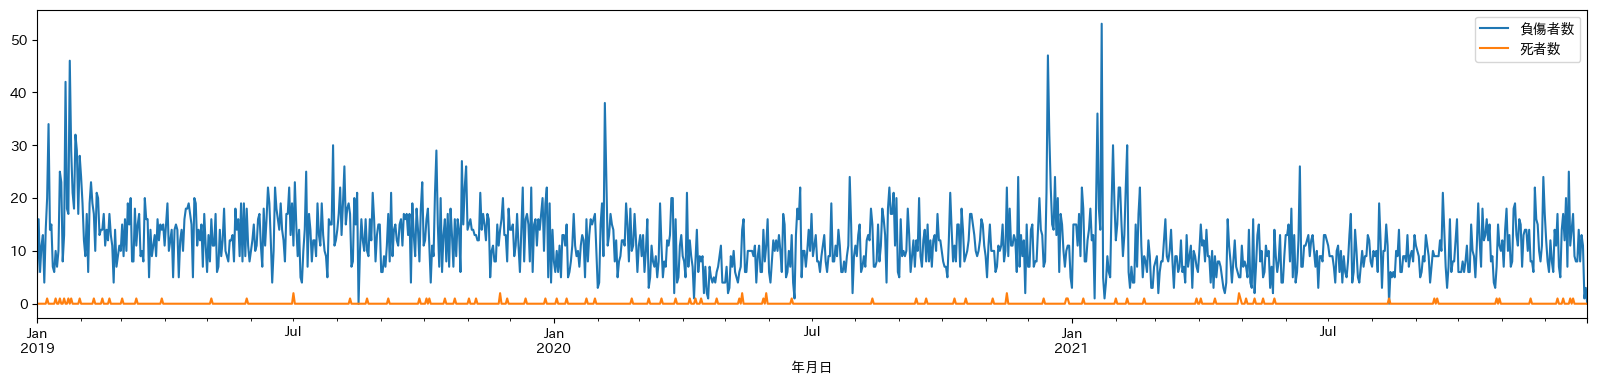

In [11]:
df_accident_weather.plot(x='年月日', y=['負傷者数', '死者数'], figsize=(20,4))
plt.show()

#### 2-b) 曜日と負傷者数の関係の可視化

In [12]:
df_accident_weather.groupby('曜日')['負傷者数'].describe()

,count,mean,std,min,25%,50%,75%,max
曜日,,,,,,,,
0,156.0,12.237179,5.701287,2.0,8.0,11.0,15.0,42.0
1,157.0,12.535032,6.249645,4.0,9.0,11.0,15.0,47.0
2,157.0,12.070064,5.354263,1.0,8.0,12.0,16.0,34.0
3,157.0,12.171975,6.343964,1.0,8.0,11.0,16.0,46.0
4,157.0,12.210191,6.216223,0.0,8.0,12.0,15.0,53.0
5,156.0,10.717949,4.789498,2.0,7.0,11.0,14.0,30.0
6,156.0,9.365385,4.768291,1.0,6.0,8.0,12.0,24.0


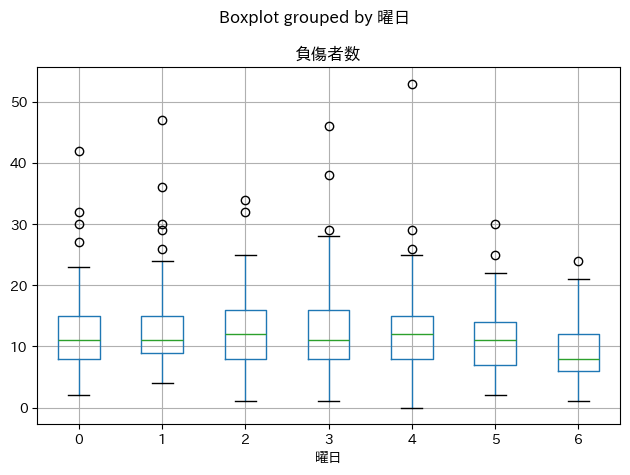

In [13]:
df_accident_weather.boxplot('負傷者数', '曜日')
plt.tight_layout()
plt.show()

#### 2-c) 移動平均の算出

In [14]:
df_accident_weather['負傷者数_移動平均'] = df_accident_weather['負傷者数'].rolling(7).mean()
df_accident_weather['死者数_移動平均'] = df_accident_weather['死者数'].rolling(7).mean()
df_accident_weather

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),最深積雪(cm).1,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時),曜日,祝日,負傷者数_移動平均,死者数_移動平均
0,2019-01-01,0.0,6.0,2.8,-2.5,2.0,0,0.0,1,32.0,0,0.2,0,1.6,雪時々みぞれ一時曇,雪時々曇一時霧,1,1,NaN,NaN
1,2019-01-02,0.0,16.0,2.4,-2.4,0.0,0,0.0,1,24.0,0,2.7,0,1.4,雪時々曇一時晴、霧を伴う,曇時々雪一時晴,2,0,NaN,NaN
2,2019-01-03,0.0,6.0,1.8,-3.1,0.0,0,0.0,1,21.0,0,2.2,0,1.4,晴時々雪一時曇,曇一時雪,3,0,NaN,NaN
3,2019-01-04,0.0,11.0,6.0,0.5,0.0,1,0.0,1,20.0,0,2.2,0,2.3,晴時々曇,晴時々雨一時曇,4,0,NaN,NaN
4,2019-01-05,0.0,13.0,5.5,-1.8,1.5,0,3.0,0,17.0,0,2.1,0,2.0,雨時々雪,雪時々晴一時曇,5,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,0.0,13.0,-2.0,-5.7,9.0,0,12.0,0,34.0,0,0.3,0,1.5,雪時々曇,雪,0,0,11.000000,0.142857
1092,2021-12-28,0.0,11.0,-0.4,-4.5,5.5,0,9.0,0,42.0,0,1.2,0,1.8,雪時々曇,雪時々曇後晴,1,0,10.142857,0.000000
1093,2021-12-29,0.0,1.0,4.4,-4.6,0.0,0,0.0,1,33.0,0,4.7,0,1.8,曇時々晴一時雪、みぞれを伴う,雨後みぞれ時々晴,2,0,9.000000,0.000000
1094,2021-12-30,0.0,3.0,5.7,-2.2,6.5,0,1.0,0,24.0,0,2.4,0,1.8,みぞれ時々曇一時雨,雪時々曇一時みぞれ,3,0,8.285714,0.000000


#### 2-d) 負傷者数および死者数の移動平均の推移の可視化

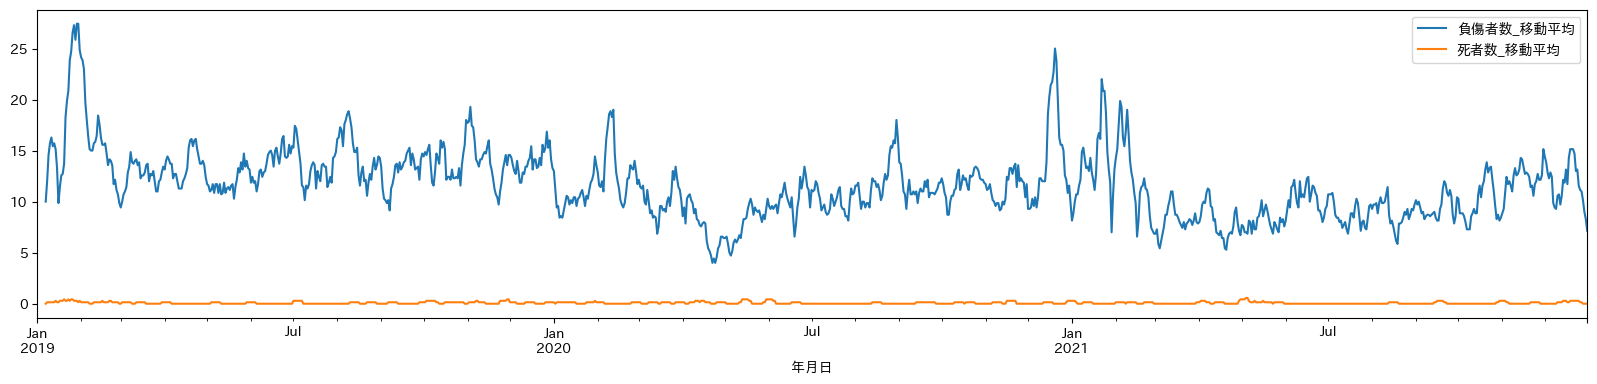

In [15]:
df_accident_weather.plot(x='年月日', y=['負傷者数_移動平均', '死者数_移動平均'], figsize=(20,4))
plt.show()

### 3. 気象データと組み合わせた分析
#### 3-a) データの絞り込み

In [16]:
df_accident_weather_2019 = df_accident_weather[df_accident_weather['年月日'] <= datetime(2019, 12, 31)]
df_accident_weather_2019

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),最深積雪(cm).1,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時),曜日,祝日,負傷者数_移動平均,死者数_移動平均
0,2019-01-01,0.0,6.0,2.8,-2.5,2.0,0,0.0,1,32.0,0,0.2,0,1.6,雪時々みぞれ一時曇,雪時々曇一時霧,1,1,NaN,NaN
1,2019-01-02,0.0,16.0,2.4,-2.4,0.0,0,0.0,1,24.0,0,2.7,0,1.4,雪時々曇一時晴、霧を伴う,曇時々雪一時晴,2,0,NaN,NaN
2,2019-01-03,0.0,6.0,1.8,-3.1,0.0,0,0.0,1,21.0,0,2.2,0,1.4,晴時々雪一時曇,曇一時雪,3,0,NaN,NaN
3,2019-01-04,0.0,11.0,6.0,0.5,0.0,1,0.0,1,20.0,0,2.2,0,2.3,晴時々曇,晴時々雨一時曇,4,0,NaN,NaN
4,2019-01-05,0.0,13.0,5.5,-1.8,1.5,0,3.0,0,17.0,0,2.1,0,2.0,雨時々雪,雪時々晴一時曇,5,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,0.0,22.0,7.5,0.5,6.0,0,0.0,1,0.0,1,1.8,0,2.0,雨一時雪,曇時々雪,4,0,16.857143,0.142857
361,2019-12-28,0.0,5.0,2.6,-0.5,1.0,0,2.0,0,2.0,0,0.4,0,1.3,雪時々晴一時曇,曇時々雪一時晴,5,0,15.285714,0.142857
362,2019-12-29,0.0,19.0,7.9,-0.4,0.0,1,0.0,1,0.0,1,6.7,0,1.4,晴後一時曇,曇時々晴,6,0,16.000000,0.142857
363,2019-12-30,0.0,4.0,4.0,-0.9,1.5,0,0.0,1,0.0,1,0.0,0,0.9,雨時々曇,曇一時雨、霧を伴う,0,0,14.142857,0.142857


#### 3-b) 降雪・降雨と負傷者数の関係

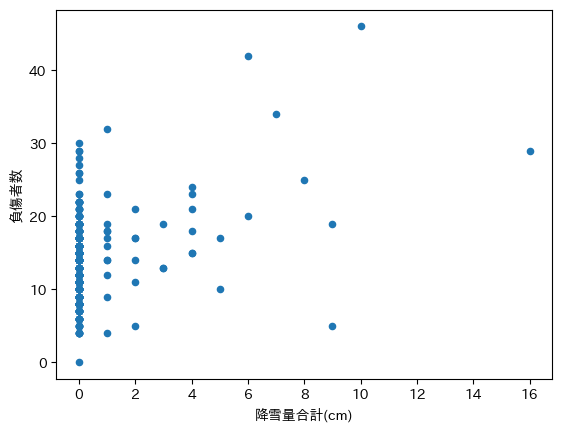

In [17]:
df_accident_weather_2019.plot.scatter('降雪量合計(cm)', '負傷者数')
plt.show()

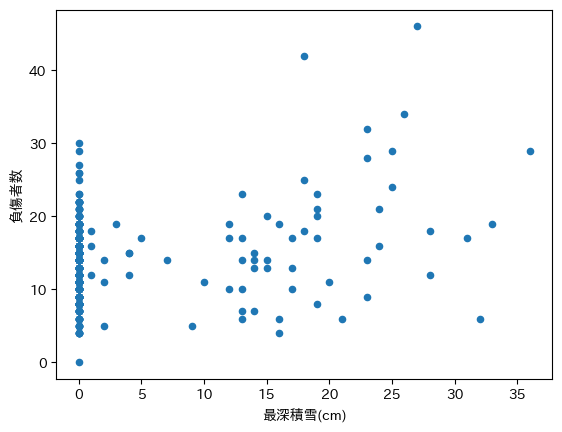

In [18]:
df_accident_weather_2019.plot.scatter('最深積雪(cm)', '負傷者数')
plt.show()

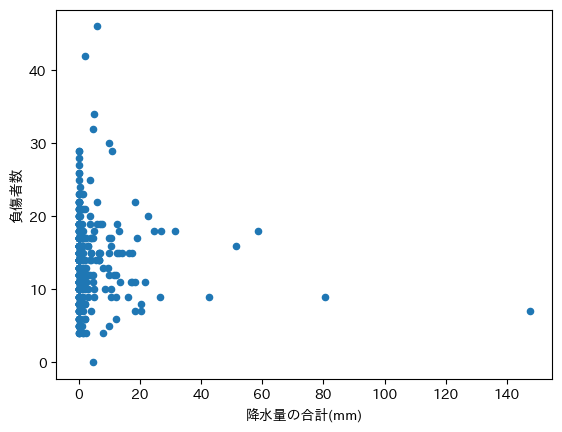

In [19]:
df_accident_weather_2019.plot.scatter('降水量の合計(mm)', '負傷者数')
plt.show()

In [20]:
df_accident_weather_2019[['降雪量合計(cm)', '最深積雪(cm)', '降水量の合計(mm)', '負傷者数']].corr()

,降雪量合計(cm),最深積雪(cm),降水量の合計(mm),負傷者数
降雪量合計(cm),1.000000,0.599899,0.039049,0.352327
最深積雪(cm),0.599899,1.000000,-0.031842,0.276296
降水量の合計(mm),0.039049,-0.031842,1.000000,-0.041021
負傷者数,0.352327,0.276296,-0.041021,1.000000


#### 3-c) 冬季データへの絞り込み

In [21]:
df_accident_weather_winter = df_accident_weather_2019[(df_accident_weather_2019['年月日'] < datetime(2019,5,1)) | (df_accident_weather_2019['年月日'] >= datetime(2019,12,1)) ]
df_accident_weather_winter

,年月日,死者数,負傷者数,最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,降雪量合計(cm),降雪量合計(cm).1,最深積雪(cm),最深積雪(cm).1,日照時間(時間),日照時間(時間).1,平均風速(m/s),天気概況(昼：06時〜18時),天気概況(夜：18時〜翌日06時),曜日,祝日,負傷者数_移動平均,死者数_移動平均
0,2019-01-01,0.0,6.0,2.8,-2.5,2.0,0,0.0,1,32.0,0,0.2,0,1.6,雪時々みぞれ一時曇,雪時々曇一時霧,1,1,NaN,NaN
1,2019-01-02,0.0,16.0,2.4,-2.4,0.0,0,0.0,1,24.0,0,2.7,0,1.4,雪時々曇一時晴、霧を伴う,曇時々雪一時晴,2,0,NaN,NaN
2,2019-01-03,0.0,6.0,1.8,-3.1,0.0,0,0.0,1,21.0,0,2.2,0,1.4,晴時々雪一時曇,曇一時雪,3,0,NaN,NaN
3,2019-01-04,0.0,11.0,6.0,0.5,0.0,1,0.0,1,20.0,0,2.2,0,2.3,晴時々曇,晴時々雨一時曇,4,0,NaN,NaN
4,2019-01-05,0.0,13.0,5.5,-1.8,1.5,0,3.0,0,17.0,0,2.1,0,2.0,雨時々雪,雪時々晴一時曇,5,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,0.0,22.0,7.5,0.5,6.0,0,0.0,1,0.0,1,1.8,0,2.0,雨一時雪,曇時々雪,4,0,16.857143,0.142857
361,2019-12-28,0.0,5.0,2.6,-0.5,1.0,0,2.0,0,2.0,0,0.4,0,1.3,雪時々晴一時曇,曇時々雪一時晴,5,0,15.285714,0.142857
362,2019-12-29,0.0,19.0,7.9,-0.4,0.0,1,0.0,1,0.0,1,6.7,0,1.4,晴後一時曇,曇時々晴,6,0,16.000000,0.142857
363,2019-12-30,0.0,4.0,4.0,-0.9,1.5,0,0.0,1,0.0,1,0.0,0,0.9,雨時々曇,曇一時雨、霧を伴う,0,0,14.142857,0.142857


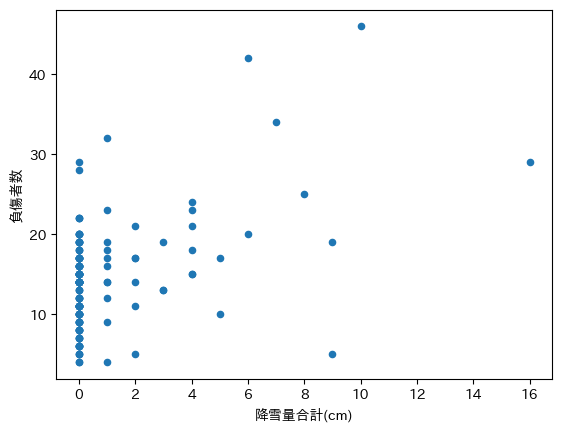

In [22]:
df_accident_weather_winter.plot.scatter('降雪量合計(cm)', '負傷者数')
plt.show()

In [23]:
df_accident_weather_winter[['降雪量合計(cm)', '最深積雪(cm)', '降水量の合計(mm)', '負傷者数']].corr()

,降雪量合計(cm),最深積雪(cm),降水量の合計(mm),負傷者数
降雪量合計(cm),1.000000,0.549113,0.330519,0.464009
最深積雪(cm),0.549113,1.000000,0.100690,0.363819
降水量の合計(mm),0.330519,0.100690,1.000000,0.137733
負傷者数,0.464009,0.363819,0.137733,1.000000


#### 3-c) 降雪がある時の統計量の確認

In [24]:
df_accident_weather_nosnow = df_accident_weather_winter[df_accident_weather_winter['降雪量合計(cm)'] == 0]['負傷者数']
df_accident_weather_nosnow.describe()

count    115.000000
mean      13.208696
std        4.842240
min        4.000000
25%       10.000000
50%       14.000000
75%       16.000000
max       29.000000
Name: 負傷者数, dtype: float64

#### 3-d) 降雪がある時の統計量の確認

In [25]:
df_accident_weather_snow = df_accident_weather_winter[df_accident_weather_winter['降雪量合計(cm)'] > 0]['負傷者数']
df_accident_weather_snow.describe()

count    36.000000
mean     18.638889
std       9.206063
min       4.000000
25%      13.750000
50%      17.000000
75%      21.500000
max      46.000000
Name: 負傷者数, dtype: float64